In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def load_matrix(address):
    """Loads data set and returns training set X and output y"""
    data_set = np.loadtxt(address, delimiter=",")
    x, y = data_set[:, :-1], data_set[:, -1]
    y = y.reshape(y.shape[0], 1)
    return x, y

In [3]:
def initialize_parameters(size):
    """Initializes parameters and bias and returns them"""
    w, b = np.zeros((size, 1)), 0
    return w, b

In [4]:
def predict(x, w, b):
    """Predicts the output based on current weights and biases"""
    predictions = np.dot(x, w)+b
    return predictions

In [5]:
def compute_cost(x, y, w, b, m):
    h = predict(x, w, b)
    cost = (1/(2*m)) * np.dot((h-y).T, h-y)
    return cost

In [6]:
def gradient_descent(x, y, w, b, m, n, iterations, learn_rate):
    J_hist = np.zeros((iterations,2))
    for i in range(iterations):
        delta = np.zeros((n, 1))
        J_hist[i][0] = i+1
        J_hist[i][1] = compute_cost(x, y, w, b, m)
        for j in range(m):
            x = training_set_x[j, :].reshape(1, n)
            delta = delta + (predict(x, w, b) - y[j][0]) * x.T
        w = w - (learn_rate/m) * delta
        b = b - (learn_rate/m) * np.sum(predict(training_set_x, w, b)-training_set_y)
    return w, b, J_hist

In [7]:
def plot_cost_history(J_history):
    plt.plot(J_history[:, 0], J_history[:, 1])
    plt.title("Cost History")
    plt.xlabel("Number of iterations")
    plt.ylabel("Cost")

In [8]:
training_set_x, training_set_y = load_matrix("ex1data1.txt")

examples, features = training_set_x.shape[0], training_set_x.shape[1]

learning_rate = 0.01
num_iterations = 1500
weight, bias = initialize_parameters(features)

Text(0.5,0,'Population of City in 10,000s')

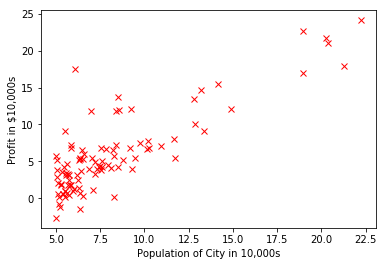

In [9]:
plt.plot(training_set_x, training_set_y,'rx')
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [10]:
print("Testing the cost function...\n")
J = compute_cost(training_set_x, training_set_y, weight, bias, examples)
print("Initial cost with weights and bias 0: ",J)

Testing the cost function...

Initial cost with weights and bias 0:  [[32.07273388]]


In [11]:
print("Running Gradient Descent...")
weight, bias, J_history = gradient_descent(training_set_x, training_set_y, weight, bias, examples, features, num_iterations, learning_rate)
print('Parameters found by gradient descent:\nWeight: ', weight)
print('\nBias: ', bias)

Running Gradient Descent...
Parameters found by gradient descent:
Weight:  [[1.1673716]]

Bias:  -3.6403422964873937


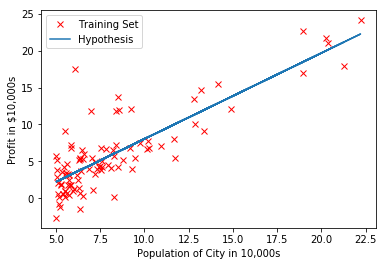

In [12]:
plt.plot(training_set_x, training_set_y, 'rx')
plt.plot(training_set_x[:, 0], predict(training_set_x, weight, bias))
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')
plt.legend(['Training Set', 'Hypothesis'])

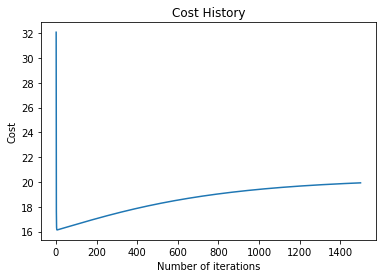

In [13]:
plot_cost_history(J_history)

In [14]:
test = np.mat([[3.5]])
print("For population = 35,000, we predict a profit of: ",10000*predict(test, weight, bias))
test = np.mat([[7]])
print("\nFor population = 70,000, we predict a profit of: ",10000*predict(test, weight, bias))

For population = 35,000, we predict a profit of:  [[4454.58310399]]

For population = 70,000, we predict a profit of:  [[45312.58917286]]
